# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where we'll get different information about each of the features in ou data. 

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,RocCurveDisplay

# Load Data

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset we're working with. 

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of your data?

In [3]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(df)

303

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum() #Check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Gives Number of people having heart disease or not

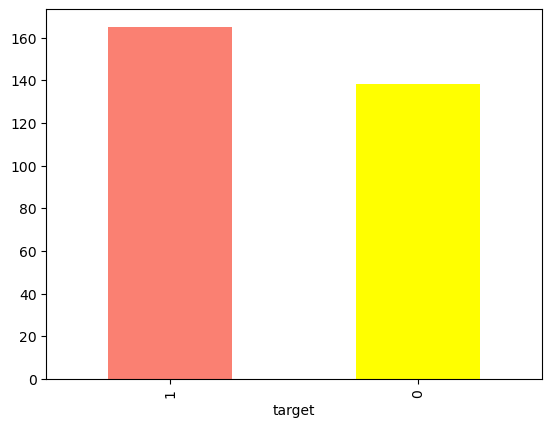

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","yellow"]);

# Heart Disease frequency according to sex

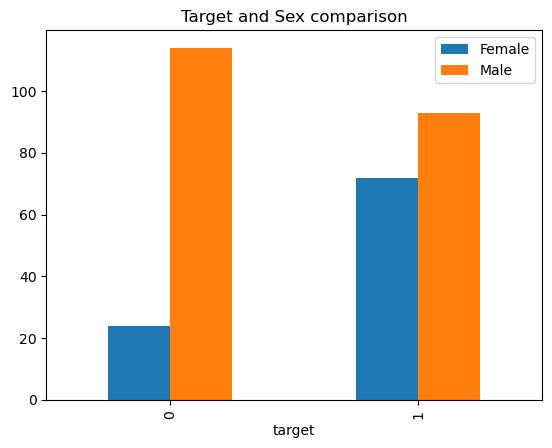

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("Target and Sex comparison")
plt.legend(["Female","Male"]);

''

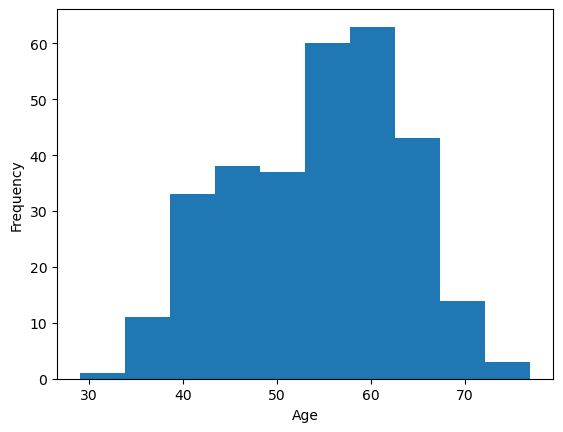

In [9]:
df["age"].plot(kind="hist") #Shows the distribution of age column with heart disease
plt.xlabel("Age")
;

## Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

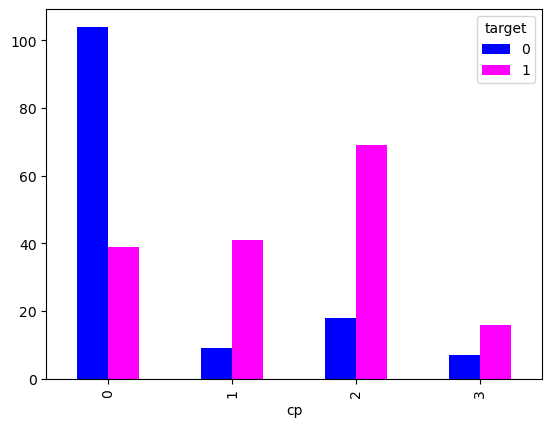

In [10]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["blue","magenta"]);

## Age vs. Max Heart Rate for Heart Disease

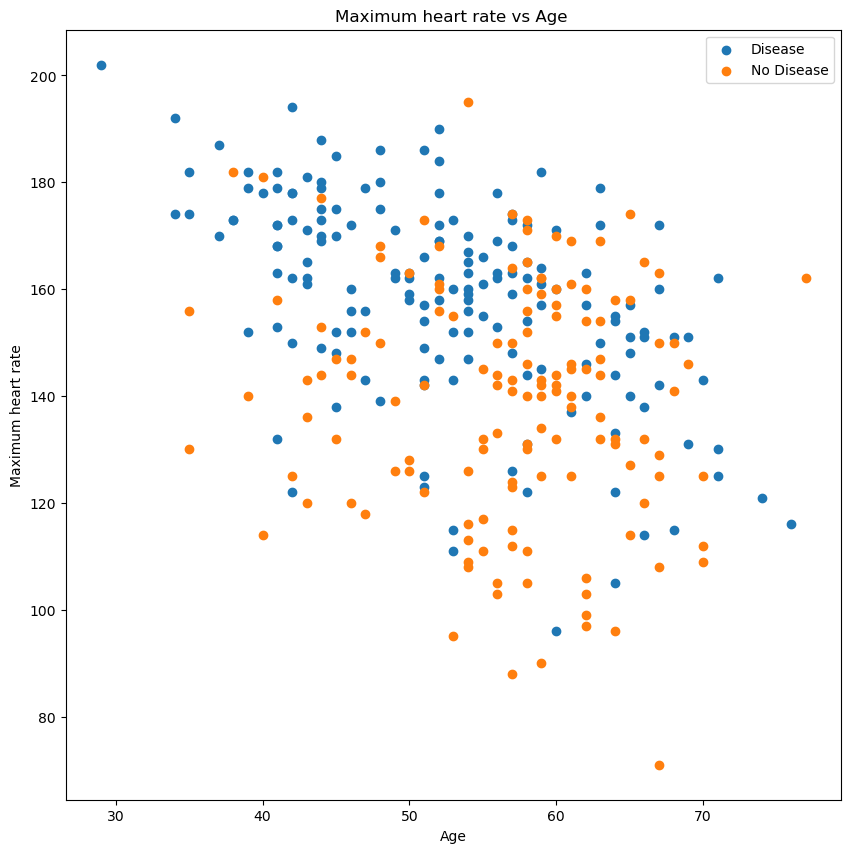

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1]) #Scatter with Positive examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0]) #Scatter with Negative examples
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.title("Maximum heart rate vs Age ")
plt.legend(["Disease","No Disease"]);


In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

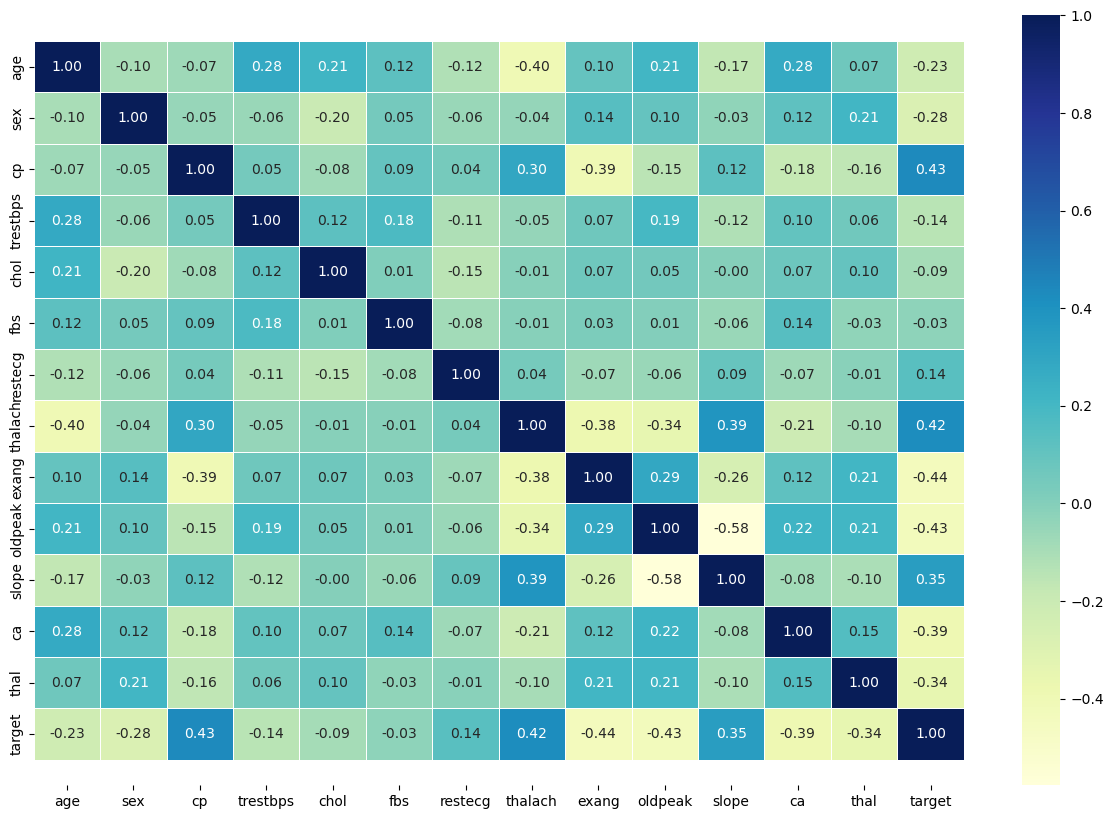

In [13]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5) Modelling

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X=df.drop("target",axis=1)
y=df["target"]

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
np.random.seed(43)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #Split into train and test set

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3


In [19]:
y_train,len(y_train)

(17     1
 36     1
 94     1
 210    0
 268    0
       ..
 145    1
 16     1
 58     1
 277    0
 255    0
 Name: target, Length: 242, dtype: int64,
 242)

 Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [20]:
models={"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier(),"Logistic Regression":LogisticRegression()} #Created a dictionary consisting of models

In [21]:
#Created a Function which train models from created dictionary and also calculate test scores and append it in model_score dictonary
np.random.seed(43)
def fit_score(models,X_train,X_test,y_train,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score
        

In [22]:
np.random.seed(43)
model_score=fit_score(models,X_train,X_test,y_train,y_test)
model_score

C:\Users\mansi\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6557377049180327,
 'Random Forest': 0.8852459016393442,
 'Logistic Regression': 0.8852459016393442}

# Model Comparison

<Axes: >

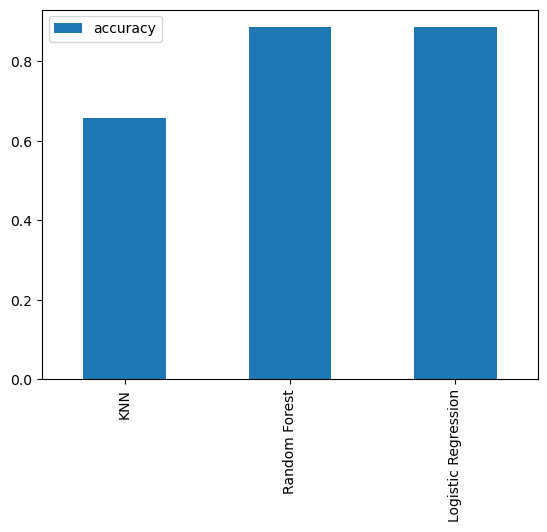

In [23]:
model_vis=pd.DataFrame(model_score,index=["accuracy"])
model_vis.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.

We will look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [24]:
#Lets tune KNN
np.random.seed(43)
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train) #Fit the algorithm
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [25]:
np.random.seed(43)
train_scores


[1.0,
 0.7644628099173554,
 0.7851239669421488,
 0.756198347107438,
 0.7396694214876033,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7272727272727273,
 0.7148760330578512,
 0.6818181818181818,
 0.6942148760330579,
 0.7066115702479339,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512]

In [26]:
np.random.seed(43)
test_scores

[0.6721311475409836,
 0.5409836065573771,
 0.6557377049180327,
 0.5901639344262295,
 0.6557377049180327,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6557377049180327,
 0.5737704918032787,
 0.6229508196721312,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6065573770491803,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082]

Maximum KNN score on the test data: 72.13%


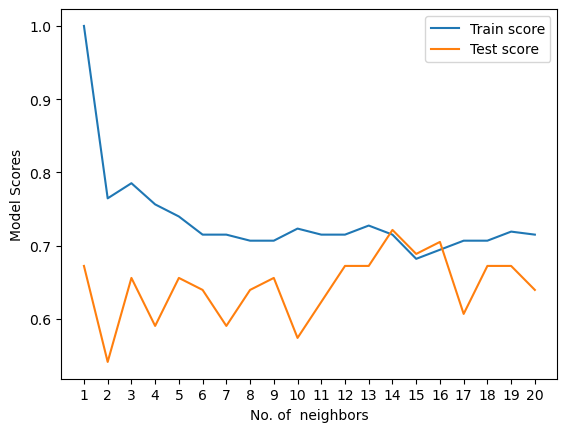

In [27]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of  neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning using RandomizedSearchCV
We will tune
1)LogisticRegression()
2)RandomForestClassifier()

In [28]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]} #Hyperparameter for Logistic Regression

rf_grid={"n_estimators":np.arange(10,1000,50), 
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_depth":[None,3,5,10]} #Hyperparameter for RandomForestClassifier


    

In [29]:
np.random.seed(43)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True) #Tune Logiistic
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True) #Tune RandomForestClassifier


In [30]:
rs_log_reg.fit(X_train,y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_ #Finds best Parameters

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test,y_test)

0.9016393442622951

In [33]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [35]:
rs_rf.score(X_test,y_test)

0.8852459016393442

# Hyperparameter tuning using GridSearchCV

In [36]:
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]} #Hyperparameter for Logistic Regression




In [37]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [38]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
y_preds=gs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [43]:
y_test

242    0
130    1
208    0
160    1
124    1
      ..
176    0
65     1
11     1
67     1
185    0
Name: target, Length: 61, dtype: int64

In [44]:
#RocCurveDisplay
y_proba=gs_log_reg.predict_proba(X_test)[:,1]

In [45]:
y_proba

array([0.1763    , 0.89007598, 0.24377781, 0.80392818, 0.97840807,
       0.88259969, 0.33279937, 0.94362997, 0.87757343, 0.69636051,
       0.42308517, 0.90021674, 0.43732549, 0.69538036, 0.73039674,
       0.71655251, 0.03174392, 0.46645513, 0.93580044, 0.69107827,
       0.82043881, 0.90753541, 0.03851195, 0.05461712, 0.86075858,
       0.91527262, 0.69564314, 0.88914808, 0.91157039, 0.13515816,
       0.60046607, 0.14679568, 0.19107628, 0.74786974, 0.87852257,
       0.92030503, 0.07135799, 0.58656707, 0.12445972, 0.52936063,
       0.90069402, 0.71162079, 0.11303488, 0.04721046, 0.6195972 ,
       0.03609619, 0.3931979 , 0.83732537, 0.57789586, 0.87595871,
       0.69360132, 0.35567468, 0.69267974, 0.29668179, 0.96173376,
       0.89646836, 0.22945793, 0.79079122, 0.91057353, 0.85141666,
       0.60600332])

In [46]:
from sklearn.metrics import roc_curve

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


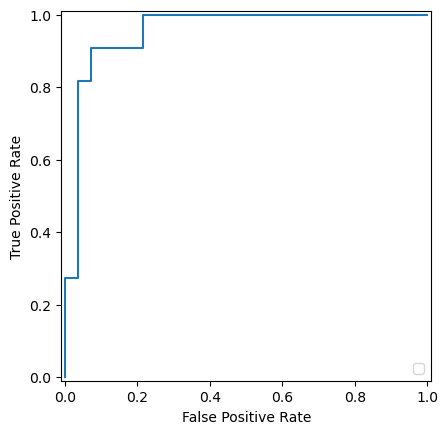

In [48]:
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
auc_score=roc_auc_score(y_test,y_preds)

In [51]:
auc_score

0.875

In [52]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[21  7]
 [ 0 33]]


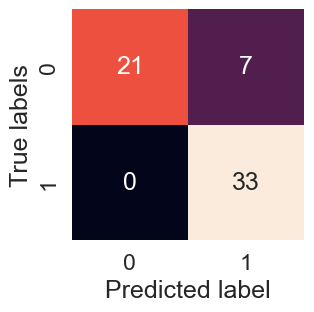

In [53]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True labels")
plot_conf_mat(y_test,y_preds)

In [54]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       0.82      1.00      0.90        33

    accuracy                           0.89        61
   macro avg       0.91      0.88      0.88        61
weighted avg       0.91      0.89      0.88        61



# Cross Validation score showing accuracy,precision,recall,f1 scores

In [55]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [56]:
clf=LogisticRegression(C=2.592943797404667,solver="liblinear")

In [57]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc
accuracy=np.mean(cv_acc)
accuracy#Calculate accuracy

0.8248633879781421

In [58]:
#Calculates precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
precision=np.mean(cv_precision)
precision

0.8188009641520078

In [59]:
#Calculates recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
recall=np.mean(cv_recall)
recall

0.8787878787878787

In [60]:
#Calculates f1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
f1=np.mean(cv_f1)
f1

0.8464039460644465

In [61]:
Score_df=pd.DataFrame({"accuracy":accuracy,"precision":precision,"Recall":recall,"F1":f1},index=[0])
Score_df

,accuracy,precision,Recall,F1
0,0.824863,0.818801,0.878788,0.846404


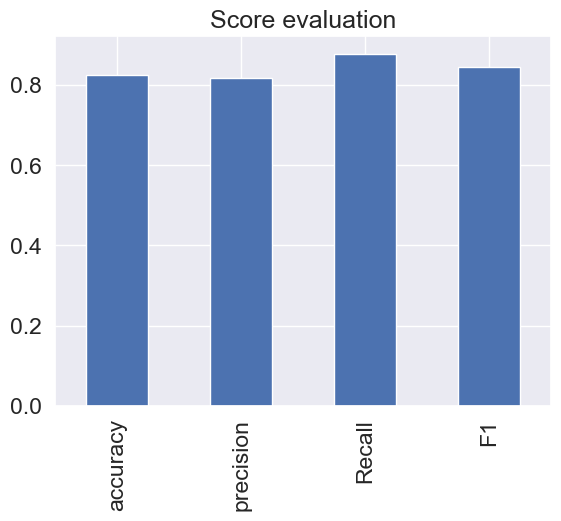

In [62]:
Score_df.T.plot.bar(title="Score evaluation",legend=False);

# Feature Importance

In [63]:
clf.fit(X_train,y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [64]:
clf.coef_

array([[ 8.10775627e-03, -1.21085539e+00,  8.31887321e-01,
        -1.38987254e-02, -5.92159058e-04,  4.76824440e-02,
         4.65759259e-01,  2.17223469e-02, -7.85880888e-01,
        -4.84854496e-01,  6.99596082e-01, -6.45918429e-01,
        -8.25247415e-01]])

In [65]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.008107756273214388,
 'sex': -1.2108553850663915,
 'cp': 0.8318873213753093,
 'trestbps': -0.01389872537652363,
 'chol': -0.0005921590584160306,
 'fbs': 0.04768244403668112,
 'restecg': 0.46575925923953976,
 'thalach': 0.021722346859565984,
 'exang': -0.7858808880827194,
 'oldpeak': -0.4848544955819413,
 'slope': 0.6995960821729758,
 'ca': -0.6459184294589381,
 'thal': -0.8252474149038189}

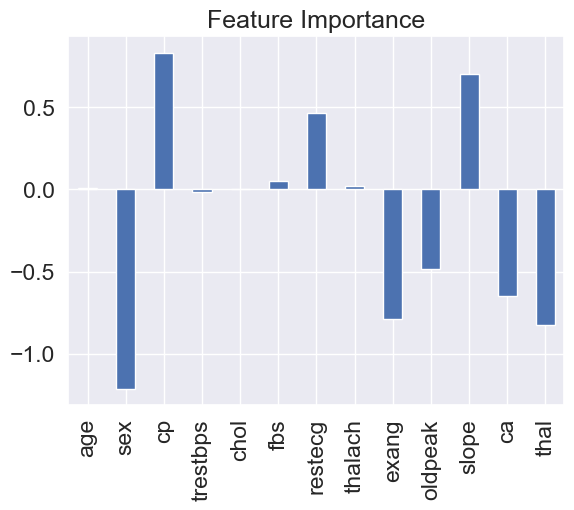

In [66]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [67]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [68]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
